# Лабораторная работа №3.2.5
## Выполнил Усеинов Булат Рустэмович 
### 778 группа 

In [2]:
import numpy as np
import pandas as pd
from scipy import interpolate
from matplotlib import pyplot as plt

### Объявим приборные погрешности величин в эксперименте.

In [3]:
delta_L = 0.002
delta_C = 2 * (10** (-9))
delta_U = 0.5
delta_nu = 1
delta_a0 = 0.05
delta_a100 = 0.01

## Часть I. Исследование резонансных кривых.

### Найдем резонансную частоту по формуле и определим погрешность
$$\nu_0 = \frac{1}{2\pi \sqrt{LC}}$$

In [4]:
L = 0.1
C = 1* 10 ** -7
eps_L = delta_L / L
eps_C = delta_C / C
eps_LC = eps_L + eps_C
delta_LC = eps_LC * L*C
delta_nu0 = (((L*C)**(-1.5))*delta_LC)/(4 * np.pi)
print("deltaNu =",delta_nu0)

deltaNu = 31.830988618379067


In [5]:
NU = 1.0 / (2 * 3.14159 * ((L*C)**0.5))
print ("Nu =", NU)

Nu = 1591.5507752443825


### Теоритический резонанс $\nu = 1591\pm 32 Гц$ не совпадает с экспериментальным $\nu_0 = 1567 Гц$, определленным по максимальной амплитуде колебаний на экране осциллографа

### Проведем эксперимент для $R = 0 \Omega$

In [6]:
data0 = pd.DataFrame()
data0["U, points"] = [10, 12, 14, 16, 18, 20, 22, 23, 24, 25, 26, 28, 30, 32, 34, 36, 32, 30, 28, 26, 25, 24, 23, 22, 20, 18, 16, 14, 12]
data0["U, V"] = data0["U, points"] * (3.0 / 63)
data0["Nu, Hz"] = [1505, 1515, 1518, 1530, 1536, 1540, 1543, 1545, 1546, 1548, 1550, 1552, 1555, 1558, 1560, 1568, 1577, 1580, 1583, 1586, 1588, 1590, 1591, 1594, 1597, 1602, 1609, 1615, 1624]
data0["U/U0"] = data0["U, points"] / 36.0
data0["Nu/Nu0"] = data0["Nu, Hz"] / 1568.0
data0["delta_NuNu0"] = data0["Nu/Nu0"] * ((1.0/data0["Nu, Hz"])+(1.0/1568))
data100 = pd.DataFrame()
data100["U, points"] = [6, 8, 10, 12, 14, 15, 16, 17, 18, 20, 22, 22.5, 22, 20, 18, 17, 16, 15, 14, 12, 10, 8, 6]
data100["U, V"] = data100["U, points"] * (1.0 / 63)
data100["Nu, Hz"] = [1308, 1364, 1407, 1438, 1464, 1475, 1486, 1495, 1505, 1525, 1557, 1566, 1592, 1624, 1652, 1667, 1680, 1697, 1715, 1757, 1820, 1918, 2109]
data100["U/U0"] = data100["U, points"] / 22.5
data100["Nu/Nu0"] = data100["Nu, Hz"] / 1568.0
data100["delta_NuNu0"] = data100["Nu/Nu0"] * ((1.0/data100["Nu, Hz"])+(1.0/1568))

In [7]:
data0

,"U, points","U, V","Nu, Hz",U/U0,Nu/Nu0,delta_NuNu0
0,10,0.476190,1505,0.277778,0.959821,0.001250
1,12,0.571429,1515,0.333333,0.966199,0.001254
2,14,0.666667,1518,0.388889,0.968112,0.001255
3,16,0.761905,1530,0.444444,0.975765,0.001260
4,18,0.857143,1536,0.500000,0.979592,0.001262
5,20,0.952381,1540,0.555556,0.982143,0.001264
6,22,1.047619,1543,0.611111,0.984056,0.001265
7,23,1.095238,1545,0.638889,0.985332,0.001266
8,24,1.142857,1546,0.666667,0.985969,0.001267
9,25,1.190476,1548,0.694444,0.987245,0.001267


### Проведем эксперимент для $R = 100 \Omega$

In [8]:
data100

,"U, points","U, V","Nu, Hz",U/U0,Nu/Nu0,delta_NuNu0
0,6.0,0.095238,1308,0.266667,0.834184,0.001170
1,8.0,0.126984,1364,0.355556,0.869898,0.001193
2,10.0,0.158730,1407,0.444444,0.897321,0.001210
3,12.0,0.190476,1438,0.533333,0.917092,0.001223
4,14.0,0.222222,1464,0.622222,0.933673,0.001233
5,15.0,0.238095,1475,0.666667,0.940689,0.001238
6,16.0,0.253968,1486,0.711111,0.947704,0.001242
7,17.0,0.269841,1495,0.755556,0.953444,0.001246
8,18.0,0.285714,1505,0.800000,0.959821,0.001250
9,20.0,0.317460,1525,0.888889,0.972577,0.001258


### В одних осях построим оба графика $U/U_0 (\nu / \nu_0)$  для $R =0 \Omega$ и $R = 100 \Omega$

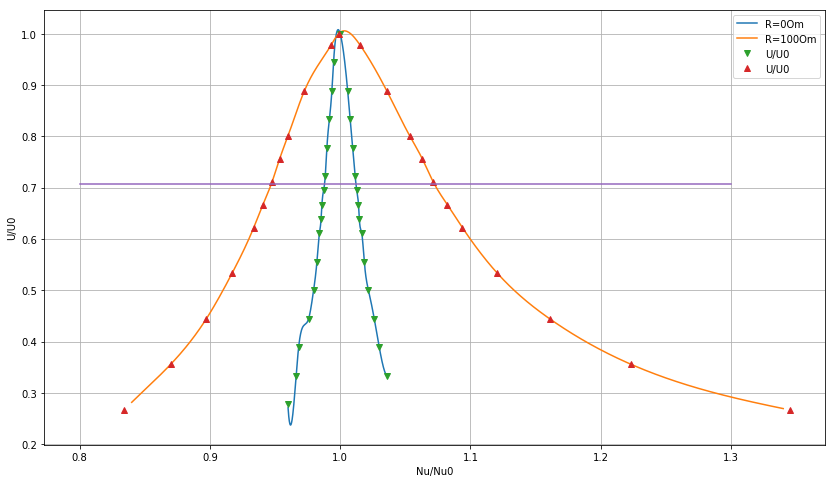

In [9]:

x0 = np.linspace(0.96, 1.035, 700)
x100 = np.linspace(0.84, 1.34, 700)
f0 = interpolate.interp1d(data0["Nu/Nu0"], data0["U/U0"], kind='cubic')
f100 = interpolate.interp1d(data100["Nu/Nu0"], data100["U/U0"], kind='cubic')
plt.figure(figsize=(14,8))
plt.plot(x0, f0(x0), '-', label = "R=0Om")
plt.plot(x100, f100(x100), '-', label = "R=100Om" )
plt.plot(data0["Nu/Nu0"], data0["U/U0"], 'v')
plt.plot(data100["Nu/Nu0"], data100["U/U0"], '^')
plt.plot([0.8, 1.3], [1./(2** 0.5), 1./(2** 0.5)])
plt.xlabel("Nu/Nu0")
plt.ylabel("U/U0")
plt.grid()
plt.legend()

#### Найдем точки на графиках лежащие на высоте $\dfrac{1}{\sqrt{2}}$ и посчитаем "ширину" графика на этой высоте для $R = 0\Omega$.

In [10]:
for i in x0:
    if (f0(i) < (1./(2** 0.5) + 0.001)) and (f0(i) > (1./(2** 0.5) - 0.001)):
        print(i)

0.9880042918454935
1.012145922746781


In [11]:
deltaomega2 = 1.012145922746781 - 0.9880042918454935
deltaomega2

0.024141630901287514

In [12]:
delta_omega2 = 2*0.001
eps_omega2 = delta_omega2/deltaomega2
eps_omega2

0.08284444444444458

#### Рассчитаем добротность контура с сопротивлением $R = 0\Omega$ по формуле:

$$Q = \dfrac{1}{2\Delta\Omega}$$

$2\Delta\Omega = 0.024$

In [13]:
Q_0 = 1 / ( deltaomega2)
delta_Q_0 = Q_0 * eps_omega2
print("Q0 =",Q_0,"+/-",delta_Q_0)

Q0 = 41.42222222222229 +/- 3.431600987654332


### Получаем добротность при $Q_{0\Omega} = 41.42 \pm 3.43 $

### Найдем точки на графиках лежащие на высоте $\dfrac{1}{\sqrt{2}}$ и посчитаем "ширину" графика на этой высоте для $R = 100\Omega$.

In [14]:
for i in x100:
    if (f100(i) < (1./(2** 0.5) + 0.002)) and (f100(i) > (1./(2** 0.5) - 0.002)):
        print(i)

0.9472961373390558
1.072474964234621


In [15]:
deltaomega2_1 = 1.072474964234621 - 0.9472961373390558
deltaomega2_1


0.12517882689556514

In [16]:
delta_omega2_1 = 2*0.001
eps_omega2_1 = delta_omega2_1/deltaomega2_1
eps_omega2_1

0.01597714285714285

### Рассчитаем добротность контура с сопротивлением $R = 100\Omega$ по формуле:

$$Q = \dfrac{1}{2\Delta\Omega}$$

$2\Delta\Omega = 0.125$

In [17]:
Q_100 = 1 / ( deltaomega2_1)
delta_Q_100 = Q_100 * eps_omega2_1
print("Q100 =",Q_100,"+/-",delta_Q_100)

Q100 = 7.988571428571426 +/- 0.1276345469387754


### Получаем добротность $Q_{100\Omega} = 7.99 \pm 0.13 $

## Часть II. Процессы установления и затухания колебаний.

### Снимем значения амплитуд с осциллографа и количество периодов между этими амплитудами для возрастающего и убывающего участка цуга для сопротивлений $R = 0\Omega \text{ и } R = 100\Omega$

In [18]:
U00 = 34
data_0 = pd.DataFrame()
data_0["Uk, points"] = [8., 8, 26, 28]
data_0["Uk, V"] = data_0["Uk, points"] * 0.1
data_0["Ukn, points"] = [12, 15.5, 28, 29.5]
data_0["Ukn, V"] = data_0["Ukn, points"] * 0.1
data_0["N"] = [2, 4, 3, 5]
data_0["uk, points"] = [32., 32, 20, 18.5]
data_0["uk, V"] = data_0["uk, points"] * 0.1
data_0["ukn, points"] = [25, 22, 16, 13]
data_0["ukn, V"] = data_0["ukn, points"] * 0.1
data_0["n"] = [3, 5, 3, 4]
U0100 = 37
data_100 = pd.DataFrame()
data_100["Uk, points"] = [14, 14, 30, 32]
data_100["Uk, V"] = data_100["Uk, points"] * 0.02
data_100["Ukn, points"] = [30, 32, 34, 34.5]
data_100["Ukn, V"] = data_100["Ukn, points"] * 0.02
data_100["N"] = [3, 4, 2, 2]
data_100["uk, points"] = [37, 37, 25, 17]
data_100["uk, V"] = data_100["uk, points"] * 0.02
data_100["ukn, points"] = [25, 17, 8, 7.5]
data_100["ukn, V"] = data_100["ukn, points"] * 0.02
data_100["n"] = [1, 2, 3, 2]

In [19]:
data_0

,"Uk, points","Uk, V","Ukn, points","Ukn, V",N,"uk, points","uk, V","ukn, points","ukn, V",n
0,8.0,0.8,12.0,1.20,2,32.0,3.20,25,2.5,3
1,8.0,0.8,15.5,1.55,4,32.0,3.20,22,2.2,5
2,26.0,2.6,28.0,2.80,3,20.0,2.00,16,1.6,3
3,28.0,2.8,29.5,2.95,5,18.5,1.85,13,1.3,4


In [20]:
data_100

,"Uk, points","Uk, V","Ukn, points","Ukn, V",N,"uk, points","uk, V","ukn, points","ukn, V",n
0,14,0.28,30.0,0.60,3,37,0.74,25.0,0.50,1
1,14,0.28,32.0,0.64,4,37,0.74,17.0,0.34,2
2,30,0.60,34.0,0.68,2,25,0.50,8.0,0.16,3
3,32,0.64,34.5,0.69,2,17,0.34,7.5,0.15,2


### Рассчитаем добротность контура по формулам и ее погрешность

 $\theta =  \dfrac{1}{n} \cdot \log{\dfrac{U_0 - U_k}{U_0 - U_{kn}}}$
 
 $Q = \dfrac{\pi}{\theta}$

In [21]:
data_0["Tetta"] = (1./data_0["N"]) * np.log((U00 - data_0["Uk, points"]) / (U00 - data_0["Ukn, points"]))
data_0["delta_Tetta"] = ((U00 - data_0["Uk, points"]) / (U00 - data_0["Ukn, points"]))*((delta_a0/(U00-data_0["Uk, points"]))+(delta_a0/(U00-data_0["Ukn, points"])))/((U00 - data_0["Uk, points"]) *data_0["N"] / (U00 - data_0["Ukn, points"]))
data_0["Q_1"] = np.pi / data_0["Tetta"]
data_0["delta_Q_1"] = (data_0["delta_Tetta"]/data_0["Tetta"])*data_0["Q_1"]
data_0["tetta"] = (1./data_0["n"]) * np.log((data_0["uk, points"]) / (data_0["ukn, points"]))
data_0["delta_tetta"] = ((U00 - data_0["uk, points"]) / (U00 - data_0["ukn, points"]))*((delta_a0/(U00-data_0["uk, points"]))+(delta_a0/(U00-data_0["ukn, points"])))/((U00 - data_0["uk, points"]) *data_0["n"] / (U00 - data_0["ukn, points"]))
data_0["Q_2"] = np.pi / data_0["tetta"]
data_0["delta_Q_2"] = (data_0["delta_tetta"]/data_0["tetta"])*data_0["Q_2"]

data_0

,"Uk, points","Uk, V","Ukn, points","Ukn, V",N,"uk, points","uk, V","ukn, points","ukn, V",n,Tetta,delta_Tetta,Q_1,delta_Q_1,tetta,delta_tetta,Q_2,delta_Q_2
0,8.0,0.8,12.0,1.20,2,32.0,3.20,25,2.5,3,0.083527,0.002098,37.611683,0.944672,0.082287,0.010185,38.178623,4.725629
1,8.0,0.8,15.5,1.55,4,32.0,3.20,22,2.2,5,0.085081,0.001156,36.924531,0.501886,0.074939,0.005833,41.922172,3.263281
2,26.0,2.6,28.0,2.80,3,20.0,2.00,16,1.6,3,0.095894,0.004861,32.761089,1.660743,0.074381,0.002116,42.236390,1.201771
3,28.0,2.8,29.5,2.95,5,18.5,1.85,13,1.3,4,0.057536,0.003889,54.601815,3.690539,0.088205,0.001402,35.616806,0.565994


In [22]:
print("Q_1 =",data_0["Q_1"].mean(), "+/-", data_0["delta_Q_1"].mean())


Q_1 = 40.47477938803502 +/- 1.6994598492621809


In [23]:
print("Q_2 =",data_0["Q_2"].mean(), "+/-", data_0["delta_Q_2"].mean())

Q_2 = 39.488497889482126 +/- 2.439168819937284


### Получаем $Q_{0\Omega}^{\uparrow} = 40.47 \pm 1.69$ и $Q_{0\Omega}^{\downarrow} = 39.48 \pm 2.44$

In [24]:
data_100["Tetta"] = (1./data_100["N"]) * np.log((U0100 - data_100["Uk, points"]) / (U0100 - data_100["Ukn, points"]))
data_100["delta_Tetta"] = ((U0100 - data_100["Uk, points"]) / (U0100 - data_100["Ukn, points"]))*((delta_a100/(U0100-data_100["Uk, points"]))+(delta_a100/(U0100-data_100["Ukn, points"])))/((U0100 - data_100["Uk, points"]) *data_100["N"] / (U0100 - data_100["Ukn, points"]))
data_100["Q_1"] = np.pi / data_100["Tetta"]
data_100["delta_Q_1"] = (data_100["delta_Tetta"]/data_100["Tetta"])*data_100["Q_1"]
data_100["tetta"] = (1./data_100["n"]) * np.log((data_100["uk, points"]) / (data_100["ukn, points"]))
data_100["delta_tetta"] = ((U0100 - data_100["uk, points"]) / (U0100 - data_100["ukn, points"]))*((delta_a100/(U0100-data_100["uk, points"]))+(delta_a100/(U0100-data_100["ukn, points"])))/((U0100 - data_100["uk, points"]) *data_100["n"] / (U0100 - data_100["ukn, points"]))
data_100["Q_2"] = np.pi / data_100["tetta"]
data_100["delta_Q_2"] = (data_100["delta_tetta"]/data_100["tetta"])*data_100["Q_2"]
data_100

,"Uk, points","Uk, V","Ukn, points","Ukn, V",N,"uk, points","uk, V","ukn, points","ukn, V",n,Tetta,delta_Tetta,Q_1,delta_Q_1,tetta,delta_tetta,Q_2,delta_Q_2
0,14,0.28,30.0,0.60,3,37,0.74,25.0,0.50,1,0.396528,0.000621,7.922751,0.012410,0.392042,NaN,8.013407,NaN
1,14,0.28,32.0,0.64,4,37,0.74,17.0,0.34,2,0.381514,0.000609,8.234539,0.013138,0.388852,NaN,8.079142,NaN
2,30,0.60,34.0,0.68,2,25,0.50,8.0,0.16,3,0.423649,0.002381,7.415557,0.041676,0.379811,0.000393,8.271454,0.008553
3,32,0.64,34.5,0.69,2,17,0.34,7.5,0.15,2,0.346574,0.003000,9.064720,0.078466,0.409155,0.000419,7.678243,0.007872


In [25]:
print("Q_1 =",data_100["Q_1"].mean(), "+/-", data_100["delta_Q_1"].mean())

Q_1 = 8.159391734084437 +/- 0.036422525649538864


In [26]:
print("Q_2 =",data_100["Q_2"].mean(), "+/-", data_100["delta_Q_2"].mean())

Q_2 = 8.010561163274302 +/- 0.008212398239875011


### Получаем $Q_{100\Omega}^{\uparrow} = 8.16 \pm 0.04$ и $Q_{100\Omega}^{\downarrow} = 8.01 \pm 0.01$

## Часть III.  Теоретический расчет

###  Снимем значения динамического сопротивление индукции L

In [27]:
datat = pd.DataFrame()
datat["Частота"] = [50,500,1500]
datat["R_L"] = [21.76, 22.07, 24.02]
datat["L"] = [100.02, 99.98, 100.00]
datat

,Частота,R_L,L
0,50,21.76,100.02
1,500,22.07,99.98
2,1500,24.02,100.00


### Рассчитаем добротность теоретически по формуле  $Q = \dfrac{1}{R_{общ}} \sqrt{\dfrac{L}{C}}$ 

$R_{общ} = R_L + R$

In [28]:
datar = pd.DataFrame()
datar["R"] = [0,100]
datar["R_L"] = [24.02, 24.02]
datar["R_o"] = datar["R"] + datar["R_L"]
datar["Q"] = (0.1/0.0000001)**0.5/datar["R_o"]
datar

,R,R_L,R_o,Q
0,0,24.02,24.02,41.631973
1,100,24.02,124.02,8.063216


## Вывод

In [29]:
datall = pd.DataFrame()
datall["R, Ом"] = [0,100]
datall["R_конт, Ом"] = [24.02,124.02]
datall["резонанс"] = ["41.42±3.43","7.99±0.13"]
datall["Цуг вверх"] = ["40.47±1.69","8.16±0.04"]
datall["Цуг вниз"] = ["39.48±2.44","8.01±0.01"]
datall["Теория"] = [41.63,8.06]
datall

,"R, Ом","R_конт, Ом",резонанс,Цуг вверх,Цуг вниз,Теория
0,0,24.02,41.42±3.43,40.47±1.69,39.48±2.44,41.63
1,100,124.02,7.99±0.13,8.16±0.04,8.01±0.01,8.06


### Приведем формулы, по которым были рассчитаны погрешности: 

$$\Delta\nu_0 = \dfrac{\delta \nu_0}{\delta (LC)}\cdot (LC)\cdot(\varepsilon_L +\varepsilon_C)$$

$$\Delta(\dfrac{U_0}{U}) = \dfrac{U_0}{U} \cdot (\dfrac{\Delta U_0}{U_0} + \dfrac{\Delta U}{U})$$

$$\Delta(\dfrac{\nu_0}{\nu}) = \dfrac{\nu_0}{\nu} \cdot (\dfrac{\Delta \nu_0}{\nu_0} + \dfrac{\Delta \nu}{\nu})$$

$$\Delta \theta = \dfrac{\Delta(\frac{U_0-U_n}{U_0-U_{kn}})}{\frac{U_0-U_n}{U_0-U_{kn}}\cdot n}$$

$$\Delta Q= \varepsilon_{\theta}\cdot Q $$